In [1]:
%cd ~/AOI/

/home/jovyan/AOI


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from glob import glob
%matplotlib inline
from pathlib import Path
from tqdm import tqdm_notebook as tqdm

In [3]:
import cv2

In [4]:
base = Path('/home/jovyan/AOI/data/')
data1_path = base / '20180703'
data1_label_path = data1_path / 'label'
data2_path = base / '20180705'
data2_label_path = data1_path / 'label'
data3_path = base / '20180726_S1'
xml_df = pd.read_pickle('all_xml_df.p')
data_table = pd.read_pickle('all_finalcsv.p')

In [14]:
wrong_color_files = ['20180705/final/fail/S02_115_001241.jpg', 
                     '20180705/final/fail/S02_115_001635.jpg',
                     '20180705/final/fail/S02_116_002679.jpg',
                     '20180705/final/fail/S02_207_000897.jpg', 
                     '20180705/final/fail/S02_207_001250.jpg', 
                     '20180705/final/fail/S02_207_001645.jpg', 
                     '20180726_S1/final/fail/C02_115_000167.jpg']
wrong_color_files = ['/home/jovyan/AOI/data/'+x for x in wrong_color_files]

In [18]:
wrong_color_files_df = pd.DataFrame()
for f in wrong_color_files:
    img = cv2.imread(f,1)
    rgb = img.sum(axis=0).sum(axis=0) / img.shape[0]/img.shape[1]
    wrong_color_files_df = wrong_color_files_df.append(pd.Series({'ch0': rgb[0], 'ch1': rgb[1], 'ch2': rgb[2]}, name=f))

In [19]:
wrong_color_files_df.head()

,ch0,ch1,ch2
/home/jovyan/AOI/data/20180705/final/fail/S02_115_001241.jpg,33.668964,42.962340,47.756450
/home/jovyan/AOI/data/20180705/final/fail/S02_115_001635.jpg,32.199716,40.927045,46.224627
/home/jovyan/AOI/data/20180705/final/fail/S02_116_002679.jpg,29.894805,38.605903,42.553368
/home/jovyan/AOI/data/20180705/final/fail/S02_207_000897.jpg,37.637378,46.934116,52.167638
/home/jovyan/AOI/data/20180705/final/fail/S02_207_001250.jpg,38.620347,48.797304,53.720501


In [21]:
for row in tqdm(data_table.iterrows()):
    img = cv2.imread(row[0],1)
    rgb = img.sum(axis=0).sum(axis=0) / img.shape[0]/img.shape[1]
    data_table.loc[row[0],'ch0'] = rgb[0]
    data_table.loc[row[0],'ch1'] = rgb[1]
    data_table.loc[row[0],'ch2'] = rgb[2]
    

In [31]:
data_table['blue_light_rough'] = True
data_table.loc[data_table['ch0'] < 50, 'blue_light_rough'] = False
data_table.to_pickle('./all_finalcsv.p')

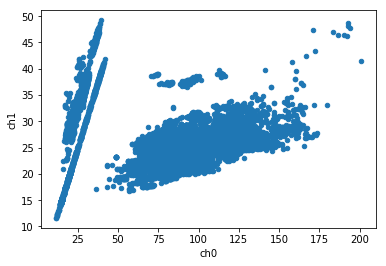

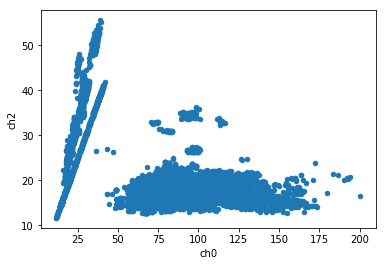

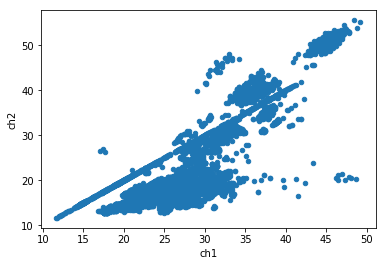

In [29]:
data_table.plot(x='ch0', y='ch1',kind='scatter')
data_table.plot(x='ch0', y='ch2',kind='scatter')
data_table.plot(x='ch1', y='ch2',kind='scatter')


